## Initial Exploration of the Raw Dataset

This dataset comes from https://data.giss.nasa.gov/gistemp/. Dataset is global-mean monthly temperature anomaly from 1880 to present day, computed as deviations from the corresponding 1951 - 1980 means.

In [3]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# read in data

# define path to dataset
path = os.path.join(os.getcwd(), os.pardir,os.pardir, "data", "raw", "global_mean_monthly_temps.csv")
print(path)

C:\Users\sophi\python_data_science_projects\climate_repo\notebooks\exploratory\..\..\data\raw\global_mean_monthly_temps.csv


In [5]:
# read in as csv and assign to variable
df = pd.read_csv(path, skiprows = 1)

In [6]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.17,-.23,-.08,-.15,-.09,-.20,-.16,-.08,-.12,-.21,-.20,-.16,-.15,***,***,-.10,-.15,-.18
1,1881,-0.18,-.13,.04,.06,.08,-.18,.01,-.03,-.14,-.21,-.17,-.06,-.08,-.08,-.16,.06,-.06,-.18
2,1882,0.17,.15,.06,-.15,-.13,-.22,-.15,-.06,-.12,-.22,-.15,-.35,-.10,-.07,.09,-.08,-.14,-.17
3,1883,-0.28,-.36,-.11,-.17,-.16,-.07,-.05,-.13,-.20,-.10,-.22,-.10,-.16,-.18,-.33,-.15,-.08,-.17
4,1884,-0.12,-.06,-.35,-.39,-.33,-.35,-.29,-.27,-.26,-.24,-.32,-.30,-.27,-.26,-.09,-.35,-.30,-.28


In [7]:
df.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
140,2020,1.17,1.24,1.17,1.13,1.01,.91,.89,.87,.98,.87,1.10,.80,1.01,1.04,1.17,1.10,.89,.98
141,2021,0.81,.64,.88,.75,.78,.84,.91,.81,.92,.99,.93,.86,.84,.84,.75,.80,.86,.95
142,2022,0.91,.89,1.05,.83,.84,.92,.93,.95,.89,.96,.72,.80,.89,.89,.89,.91,.93,.86
143,2023,0.87,.97,1.20,1.00,.93,1.08,1.18,1.19,1.47,1.33,1.42,1.35,1.17,1.12,.88,1.04,1.15,1.41
144,2024,1.21,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***


In [9]:
# separate seasonal and month columns into own datasets

df_main = df[df.columns[:-6]]
df_seasonal = df.iloc[:,[0,-6,-5,-4,-3,-2,-1]]


In [10]:
# Pivot the main dataframe into time-series format

# Melt the DataFrame to convert it to long format
df_melted = pd.melt(df_main, id_vars='Year', var_name='Month', value_name='Value')

# Combine 'Year' and 'Month' columns to create a 'year-month' column
df_melted['Year-Month'] = df_melted['Year'].astype(str) + '-' + df_melted['Month']

# Convert 'Year-Month' column to datetime
df_melted['Year-Month'] = pd.to_datetime(df_melted['Year-Month'], format='%Y-%b')

# Drop unnecessary columns
df_pivoted = df_melted[['Year-Month', 'Value']]

# Replace non-numeric values with NaN
copied_col = df_pivoted['Value'].copy()

# Use .loc for both operations to avoid SettingWithCopyWarning
df_pivoted = df_pivoted.drop('Value', axis=1)
df_pivoted.loc[:, 'Value'] = copied_col.apply(pd.to_numeric, errors='coerce')

# Sort the DataFrame by 'Year-Month'
df_pivoted = df_pivoted.sort_values('Year-Month')

# Display the pivoted DataFrame
df_pivoted

,Year-Month,Value
0,1880-01-01,-0.17
145,1880-02-01,-0.23
290,1880-03-01,-0.08
435,1880-04-01,-0.15
580,1880-05-01,-0.09
...,...,...
1159,2024-08-01,NaN
1304,2024-09-01,NaN
1449,2024-10-01,NaN
1594,2024-11-01,NaN


In [11]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1740 entries, 0 to 1739
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year-Month  1740 non-null   datetime64[ns]
 1   Value       1729 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.8 KB


In [12]:
# Remove the nan values at the end of the time series (these haven't been filled in yet for the year ahead)

df_pivoted.dropna(inplace = True)

In [13]:
df_pivoted

,Year-Month,Value
0,1880-01-01,-0.17
145,1880-02-01,-0.23
290,1880-03-01,-0.08
435,1880-04-01,-0.15
580,1880-05-01,-0.09
...,...,...
1303,2023-09-01,1.47
1448,2023-10-01,1.33
1593,2023-11-01,1.42
1738,2023-12-01,1.35


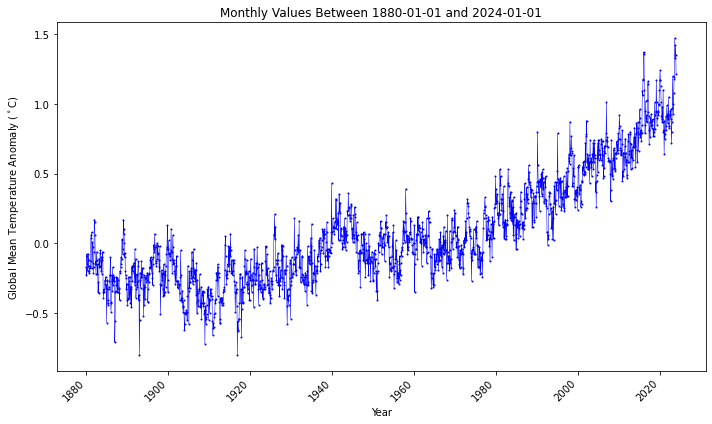

In [14]:
# plot the overall time series

plt.figure(figsize=(10, 6))
plt.plot(df_pivoted['Year-Month'].values, df_pivoted['Value'].values, marker='o', markersize = 1, linewidth = 0.5, color='b')
plt.title(f"Monthly Values Between {df_pivoted['Year-Month'][0].strftime('%Y-%m-%d')} and {df_pivoted['Year-Month'].iloc[-1].strftime('%Y-%m-%d')}")
plt.xlabel('Year')
plt.ylabel('Global Mean Temperature Anomaly ($^\circ$C)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

The columns labelled ‘DJF’, ‘MAM’, ‘JJA’, and ‘SON’ contain seasonal averages (means). For example, the ‘MAM’ column contains the average of the March, April, and May columns for each year:

In [15]:
df_seasonal

,Year,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-.15,***,***,-.10,-.15,-.18
1,1881,-.08,-.08,-.16,.06,-.06,-.18
2,1882,-.10,-.07,.09,-.08,-.14,-.17
3,1883,-.16,-.18,-.33,-.15,-.08,-.17
4,1884,-.27,-.26,-.09,-.35,-.30,-.28
...,...,...,...,...,...,...,...
140,2020,1.01,1.04,1.17,1.10,.89,.98
141,2021,.84,.84,.75,.80,.86,.95
142,2022,.89,.89,.89,.91,.93,.86
143,2023,1.17,1.12,.88,1.04,1.15,1.41


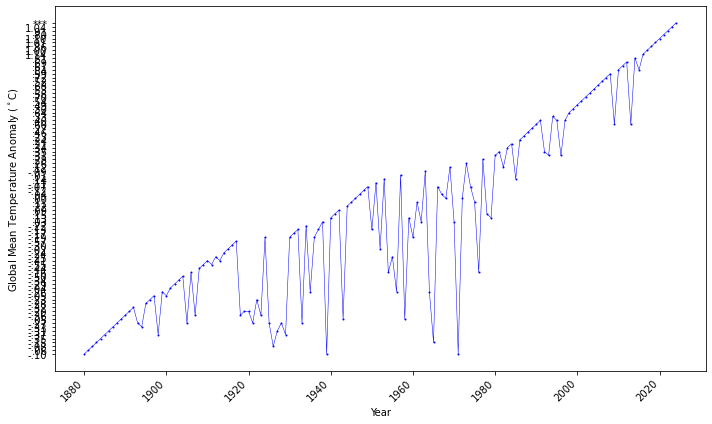

In [16]:
# Plot a separate line chart for each season, using average temperature anomaly for that season on the vertical axis
# and time (from 1880 to the latest year available) on the horizontal axis

plt.figure(figsize=(10, 6))
plt.plot(df_seasonal['Year'].values, df_seasonal['MAM'].values, marker='o', markersize = 1, linewidth = 0.5, color='b')
#plt.title(f"Monthly Values Between {df_pivoted['Year-Month'][0].strftime('%Y-%m-%d')} and {df_pivoted['Year-Month'].iloc[-1].strftime('%Y-%m-%d')}")
plt.xlabel('Year')
plt.ylabel('Global Mean Temperature Anomaly ($^\circ$C)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()